## Key Tips for Data Visualizations
- Create your vizzes with a purpose (the one you present)
- Highlight a trend, show outlier, shoing the ype of relationships between features
- Visualizaions for the analyst (vs. audience/client)

In [173]:
from turtle import color
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
import plotly.express as px

sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style = "darkgrid", font = "monospace")
sns.set_palette("rocket")

In [3]:
# i fyou do not have plotly installed, then run the following commamnd or in the terminal
#!pip install plolty 

In [3]:
mtcars = pd.read_csv("../00-data/mtcars.csv")
churn = pd.read_csv("../00-data/churn.csv", index_col = "CustomerId")
cali = pd.read_csv("../00-data/california.tsv", sep = "t")

In [7]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
churn.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,NaN,42,2,0.00,1,1,1,10134888.0,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,11254258.0,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,11393157.0,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,0.0,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,7908410.0,0


In [4]:
churn.drop("RowNumber", axis=1, inplace=True)

KeyError: "['RowNumber'] not found in axis"

In [16]:
churn.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,NaN,42,2,0.00,1,1,1,10134888.0,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,11254258.0,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,11393157.0,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,0.0,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,7908410.0,0


In [17]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           8571 non-null   object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  8576 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [18]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [19]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
plt.

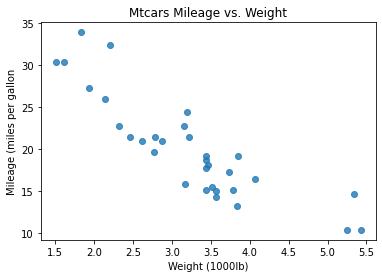

In [8]:
#plt.figure(figsize = ([12, 12]))
plt.scatter("wt", "mpg", data=mtcars, alpha = 0.8)
plt.title("Mtcars Mileage vs. Weight")
plt.xlabel("Weight (1000lb)")
plt.ylabel("Mileage (miles per gallon")
plt.show()

In [30]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
cali.shape

(20640, 10)

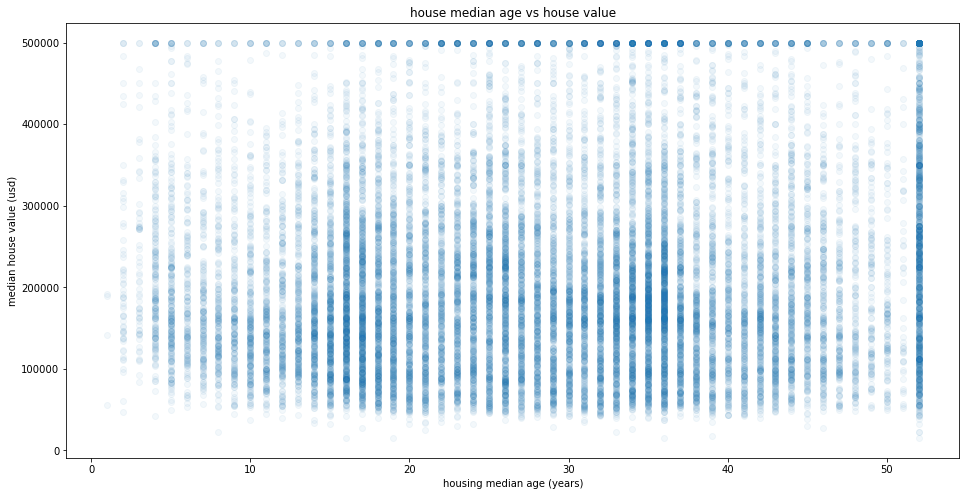

In [31]:
plt.figure(figsize = [16, 8])
plt.scatter("housing_median_age", "median_house_value", data=cali, alpha = 0.05)
plt.title("house median age vs house value")
plt.xlabel("housing median age (years)")
plt.ylabel("median house value (usd)")
plt.show()

In [11]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
churn.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,NaN,42,2,0.00,1,1,1,10134888.0,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,11254258.0,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,11393157.0,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,0.0,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,7908410.0,0


## Example Data Visualizations 
### Matplotlib
- Discrete distribution as horizontal bar chart

In [17]:
{"Ocean Proximity" : list(cali.ocean_proximity.value_counts().values)}

{'Ocean Proximity': [9135, 6551, 2658, 2290, 5]}

In [23]:
[cali.ocean_proximity.unique()]

[array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', nan, 'ISLAND'],
       dtype=object)]

In [26]:
list(cali.ocean_proximity.unique())

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', nan, 'ISLAND']

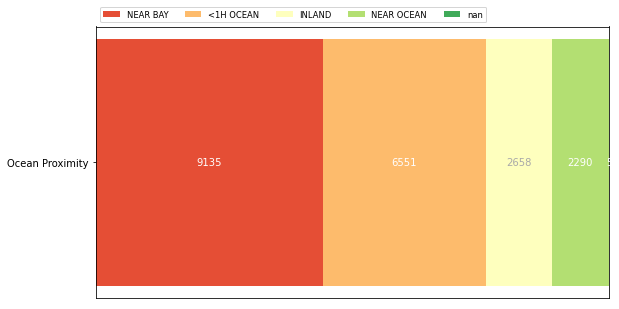

In [27]:
import numpy as np
import matplotlib.pyplot as plt


category_names = list(cali.ocean_proximity.unique())

#['Strongly disagree', 'Disagree',
#                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {"Ocean Proximity" : list(cali.ocean_proximity.value_counts().values)}


#{
#    'Question 1': [10, 15, 17, 32, 26],
#    'Question 2': [26, 22, 29, 10, 13],
#    'Question 3': [35, 37, 7, 2, 19],
#    'Question 4': [32, 11, 9, 15, 33],
#    'Question 5': [21, 29, 5, 5, 40],
#    'Question 6': [8, 19, 5, 30, 38]
#}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [28]:
churn.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,NaN,42,2,0.00,1,1,1,10134888.0,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,11254258.0,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,11393157.0,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,0.0,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,7908410.0,0


In [ ]:
# import matplotlib.pyplot as plt


labels = churn.Geography.unique()
#['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

### Seaborn Examples

In [57]:
list(sns.color_palette("rocket"))

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

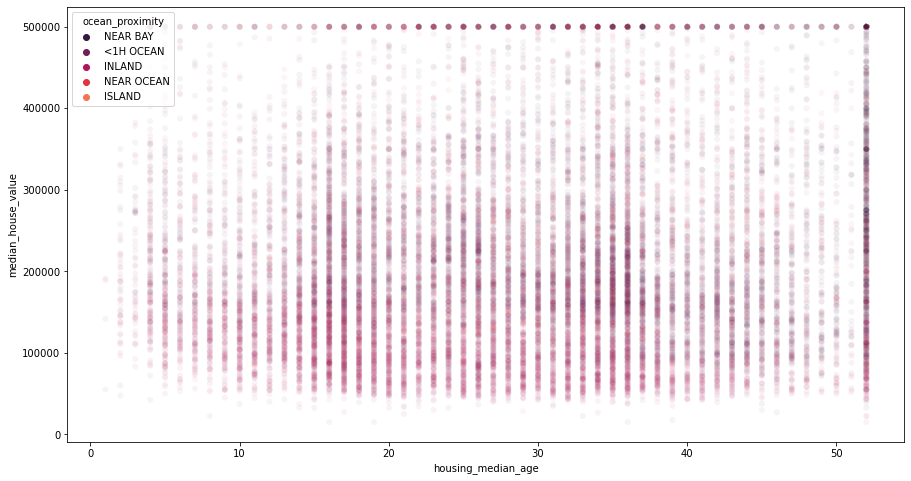

In [66]:
plt.figure(figsize =(15, 8))

sns.scatterplot(x = "housing_median_age", y = "median_house_value",
 data=cali, alpha= 0.05, hue = "ocean_proximity",
 palette= list(sns.color_palette("rocket"))[:-1]);
#["#fc9272", "blue", "red", "purple", "black"]);

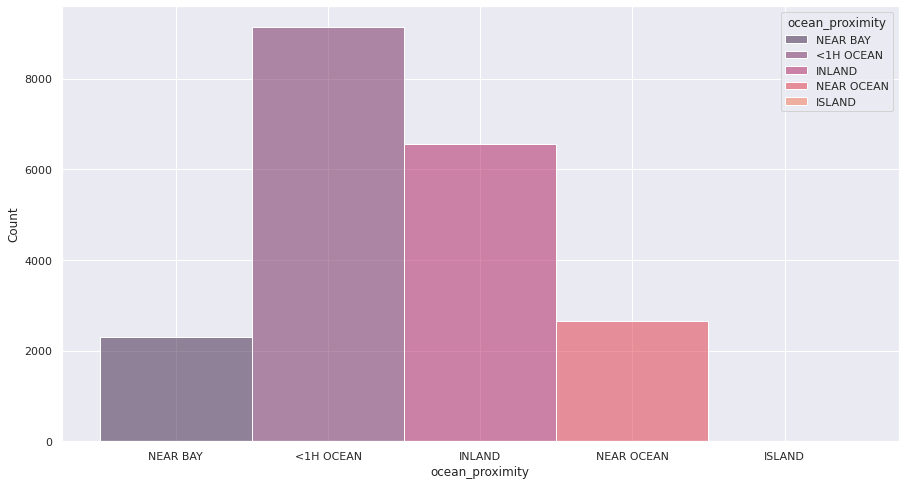

In [122]:
sns.histplot(x= cali.ocean_proximity, hue = cali.ocean_proximity );

In [121]:
sns.color_palette()

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

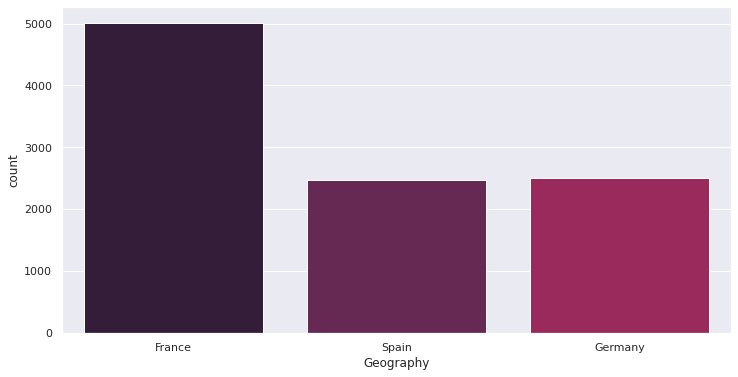

In [163]:
sns.countplot(x= churn.Geography);

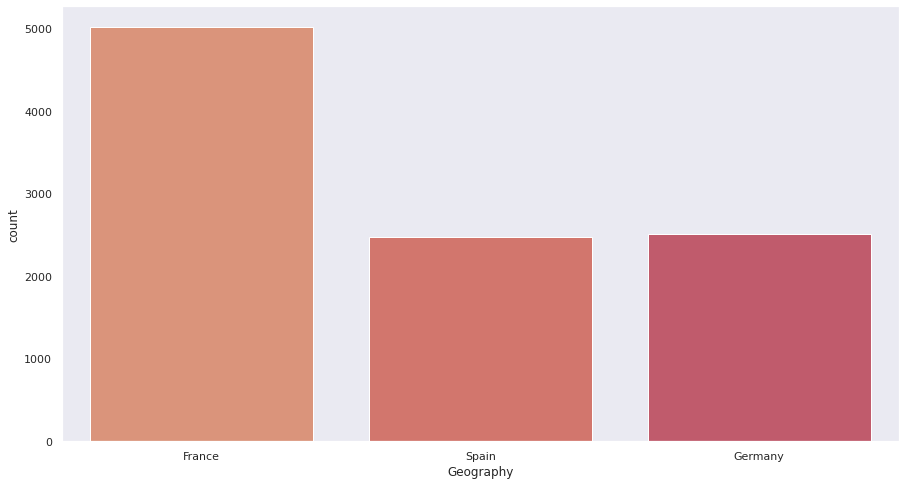

In [107]:
sns.countplot(x= churn.Geography);

In [123]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


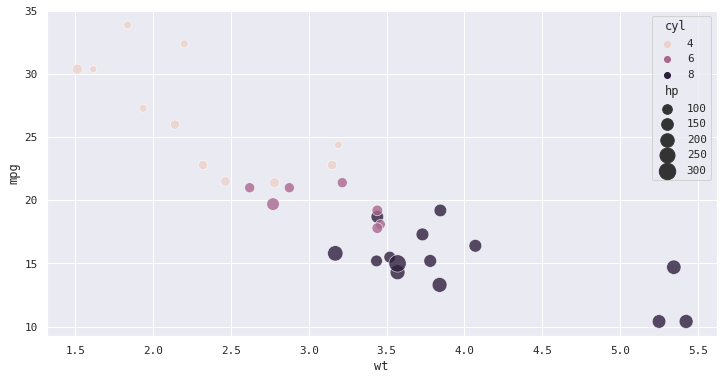

In [175]:
sns.scatterplot(x = mtcars["wt"], y = mtcars["mpg"],
 hue = mtcars["cyl"], size = mtcars['hp'],
 alpha= 0.8,
 sizes = (50, 300)
 );

Numpy
Pandas & Matplotlib
Seaborn & Poltly

Text(0.5, 1.0, 'weight vs cylinders in cars')

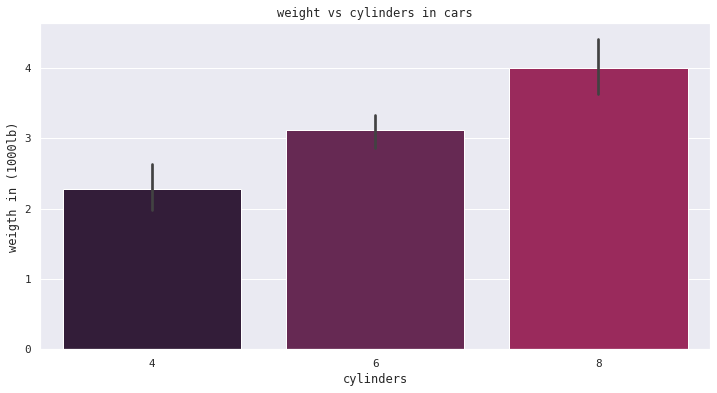

In [174]:
sns.barplot(x="cyl", y="wt", data=mtcars);
plt.xlabel("cylinders")
plt.ylabel("weigth in (1000lb)")
plt.title("weight vs cylinders in cars")

In [177]:
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [182]:
cali.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

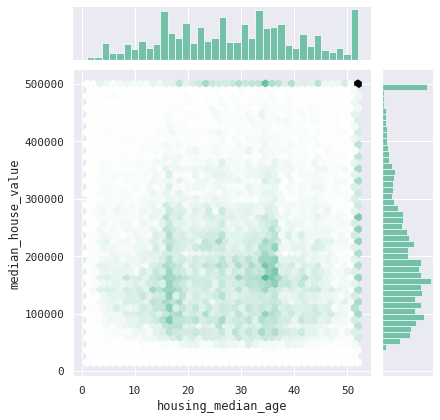

In [183]:
sns.jointplot(x='housing_median_age', y='median_house_value', kind="hex", color="#4CB391", data = cali);

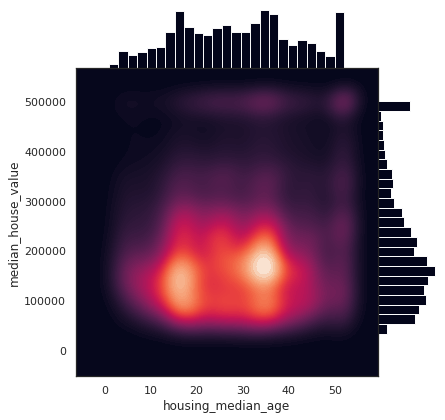

In [191]:
g = sns.JointGrid(data=cali, x='housing_median_age', y='median_house_value', space=0)
g.plot_joint(sns.kdeplot, fill = True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

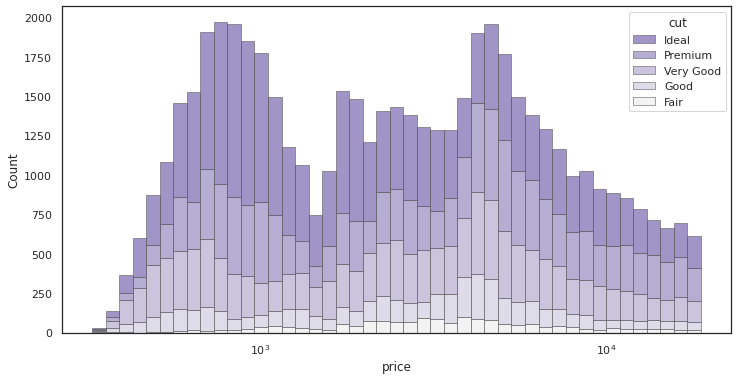

In [197]:
diamonds = sns.load_dataset("diamonds");

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
);

In [198]:
#!pip install plotly

In [199]:
import plotly.express as px

In [200]:
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [208]:
fig = px.scatter(df, x="gdpPercap", y="lifeExp",
	         size="pop", color="continent", animation_frame = "year",
                 hover_name="country", log_x=True, size_max=50)
fig.show()

In [211]:
churn.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,NaN,42,2,0.00,1,1,1,10134888.0,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,11254258.0,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,11393157.0,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,0.0,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,7908410.0,0


In [218]:
churn[churn.EstimatedSalary < 6]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,0.0,0
15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,0.0,0
15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,0.0,0
15625047,Yen,846,France,Female,38,5,0.00,1,1,1,0.0,0


In [223]:
fig = px.scatter(churn.dropna(how="any")[churn.EstimatedSalary < 11*10**6], x="Balance", y="CreditScore",
	         size="Age", color="Gender",
                 hover_name="Surname", log_x=True, size_max=100)
fig.show()

/tmp/ipykernel_406/233040013.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [228]:
cali.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [237]:
heat_data = [(y, x) for x, y in cali[['longitude', 'latitude']].values]

In [238]:
import folium 
from folium import plugins

map = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=2)

#heat_data = cali[['longitude', 'latitude']]
heat_data

plugins.HeatMap(heat_data).add_to(map)

map

In [225]:
!pip install folium

     |████████████████████████████████| 96 kB 630 kB/s eta 0:00:01
